In [19]:
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

def plot_data(datas, names, title = None, labels = None, clip_length = 256):
    xs = np.arange(min([len(data) for data in datas] + [clip_length]))
    plt.figure(figsize=(10, 5))
    for data, name in zip(datas, names):
        plt.plot(xs, data[:clip_length], label=name)
    if labels is not None:
        plt.xticks(xs, labels[:clip_length])
    if title is not None:
        plt.title(title)
    plt.legend()
    plt.show()

def SNR(ground_truth, prediction):
    return np.mean(ground_truth ** 2) / np.mean((ground_truth - prediction) ** 2)


dirs = glob('output/sphere4.obj/*')
dirs = sorted(dirs, key=lambda x: x.split('/')[-1])
subdirs = []
for dir in dirs:
    subdirs.append(sorted(glob(dir + '/*'), key=lambda x: x.split('/')[-1]))
keys = [dir.split('/')[-1] for dir in subdirs[0]]

pppm_data = [[] for i in range(len(keys))]
ghost_1st_data = [[] for i in range(len(keys))]
ghost_2nd_data = [[] for i in range(len(keys))]
pppm_precompute_times = [[] for i in range(len(keys))]
pppm_times = [[] for i in range(len(keys))]
ghost_1st_times = [[] for i in range(len(keys))]
ghost_2nd_times = [[] for i in range(len(keys))]
clip_idx = 256

for dir_parent in subdirs:
    for i, dir in enumerate(dir_parent):
        analytical = np.loadtxt(dir + '/analytical_solution.txt')[clip_idx:]
        pppm = np.loadtxt(dir + '/pppm_solution.txt')[clip_idx:]
        ghost_cell_1st = np.loadtxt(dir + '/ghost_cell_1st.txt')[clip_idx:]
        ghost_cell_2nd = np.loadtxt(dir + '/ghost_cell_2nd.txt')[clip_idx:]
        with open(dir + '/cost_time.txt') as f:
            cost_times = f.readlines()
            pppm_precompute_times[i].append(float(cost_times[0].split(' ')[-1]))
            pppm_times[i].append(float(cost_times[1].split('=')[1]))
            ghost_1st_times[i].append(float(cost_times[2].split('=')[1]))
            ghost_2nd_times[i].append(float(cost_times[3].split('=')[1]))

        pppm_data[i].append(SNR(analytical, pppm))
        ghost_1st_data[i].append(SNR(analytical, ghost_cell_1st))
        ghost_2nd_data[i].append(SNR(analytical, ghost_cell_2nd))

pppm_data = 10 * np.log10(np.array(pppm_data)).mean(axis=1)
ghost_1st_data = 10 * np.log10(np.array(ghost_1st_data)).mean(axis=1)
ghost_2nd_data = 10 * np.log10(np.array(ghost_2nd_data)).mean(axis=1)
pppm_precompute_times = np.array(pppm_precompute_times).mean(axis=1)
pppm_times = np.array(pppm_times).mean(axis=1)
ghost_1st_times = np.array(ghost_1st_times).mean(axis=1)
ghost_2nd_times = np.array(ghost_2nd_times).mean(axis=1)


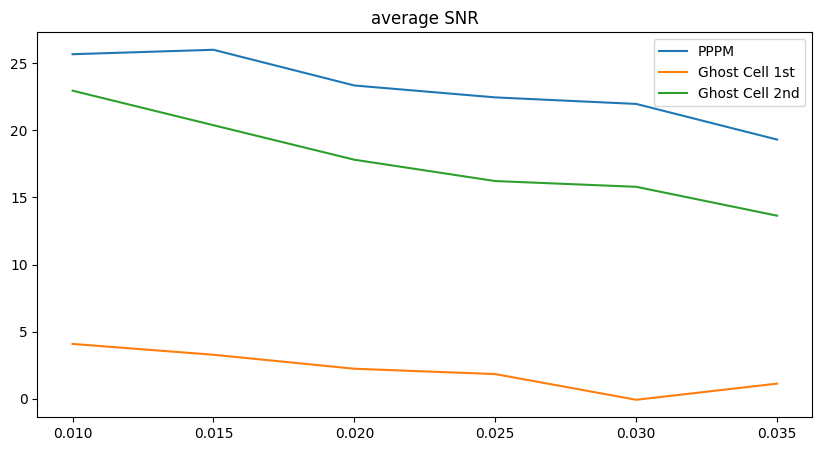

In [20]:
plot_data([pppm_data, ghost_1st_data, ghost_2nd_data], ['PPPM', 'Ghost Cell 1st', 'Ghost Cell 2nd'], labels=keys, title="average SNR")

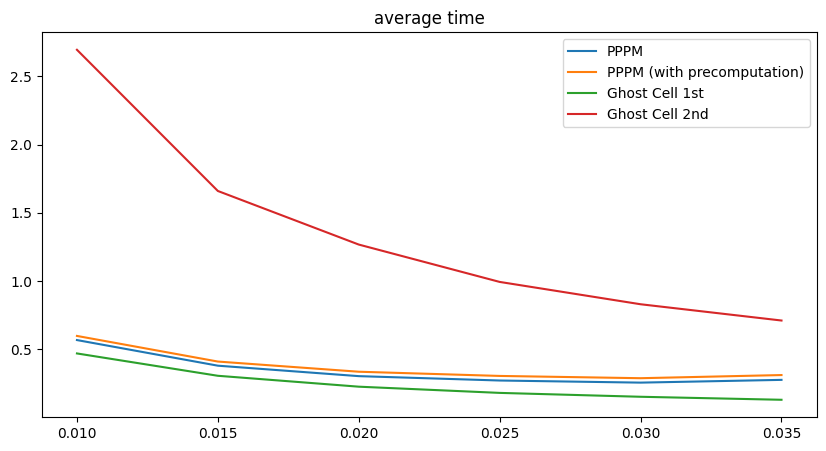

In [21]:
plot_data([pppm_times, pppm_times + pppm_precompute_times, ghost_1st_times, ghost_2nd_times], 
    ['PPPM', 'PPPM (with precomputation)', 'Ghost Cell 1st', 'Ghost Cell 2nd'], labels=keys, title="average time")